In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df =pd.read_csv('../data/AdSmartABdata.csv')
df.sample(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
329,09ef0211-6043-465c-8dd9-0de7b7293048,exposed,2020-07-10,5,Samsung SM-A310F,6,Samsung Internet,0,0
3222,6804eb1e-f4cb-4419-af7b-ce48d9031ecc,exposed,2020-07-04,7,Generic Smartphone,6,Chrome Mobile,0,0
4568,918034ab-959b-43cd-9e6c-55d5ea702e33,control,2020-07-07,8,Samsung SM-G930F,6,Facebook,0,0
3903,7d978bd2-f198-44a2-b918-9ba681a621ef,exposed,2020-07-09,17,Generic Smartphone,6,Chrome Mobile,1,0
1595,34da343c-b2cf-452a-a12d-ea3475b4b426,control,2020-07-03,15,Pixel 3,6,Facebook,1,0
145,0467d28b-c734-4ba7-b3aa-718d12097ba1,exposed,2020-07-07,11,iPhone,5,Chrome Mobile iOS,0,0
7672,f2e1b556-5e05-4d75-a588-4ce640794901,control,2020-07-04,13,Samsung SM-G960F,6,Facebook,0,0
5296,a7d117d3-8a2a-4cfe-9740-fd0eba61bc2a,exposed,2020-07-03,14,Generic Smartphone,6,Chrome Mobile,0,0
8010,fd53005c-f3f1-4f7d-97cc-84fab926bcaa,control,2020-07-04,4,Generic Smartphone,6,Chrome Mobile,0,1
1049,221d6174-3cf8-4a7c-8e6f-0e3f3bd2b074,control,2020-07-07,14,Samsung SM-J330FN,6,Samsung Internet,0,0


In [46]:
df.sort_values(by='experiment')

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
4038,818f37f3-dae8-4a33-a22e-e54056e0ba7d,control,2020-07-03,15,Samsung SM-A600FN,6,Chrome Mobile WebView,0,0
4521,902a058f-8a97-47d1-b260-9dc7011fd9fc,control,2020-07-09,13,Samsung SM-G965F,6,Samsung Internet,0,0
4519,9017d3c0-70cb-4e20-9316-86d54a941375,control,2020-07-10,15,Generic Smartphone,6,Chrome Mobile,0,0
4517,8fff9d59-1927-4932-9ef6-04068646e0db,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0
4504,8f78ea0d-da5a-43a5-b03a-41b623026007,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
1673,37396986-4e16-4024-b448-b727d339377a,exposed,2020-07-08,15,OnePlus ONEPLUS A6013,6,Facebook,0,0
1674,373cba3b-61af-4574-8c52-dc2b2e7ad5bf,exposed,2020-07-04,11,Generic Smartphone,6,Chrome Mobile,0,0
4755,9795c323-e96b-492c-b8b5-eb05de04a8c1,exposed,2020-07-09,6,Generic Smartphone,6,Chrome Mobile,0,0
4764,9812db3b-2c00-472d-8d30-a0b06c813357,exposed,2020-07-10,15,Samsung SM-G960F,6,Chrome Mobile WebView,0,0


In [47]:
print(f'Number of unquie users in the experiment: {df["auction_id"].nunique()}')
print(f'Percentage of users in control: {round(df[df["experiment"]=="control"].shape[0] * 100 / df.shape[0])} %')

Number of unquie users in the experiment: 8077
Percentage of users in control: 50 %


In [48]:
df.browser.unique()

array(['Chrome Mobile', 'Chrome Mobile WebView', 'Facebook',
       'Mobile Safari', 'Chrome Mobile iOS', 'Samsung Internet',
       'Mobile Safari UI/WKWebView', 'Chrome', 'Opera Mini',
       'Edge Mobile', 'Android', 'Pinterest', 'Opera Mobile',
       'Firefox Mobile', 'Puffin'], dtype=object)

In [49]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [95]:
import datetime
df['day'] = df['date'].apply(lambda x: pd.to_datetime(x, format ="%Y-%m-%d").day_name())
df.sort_values(by='day').head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,day
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,Friday
4002,8099b8b8-cddf-4a73-acf7-68b882199ac9,exposed,2020-07-10,6,Generic Smartphone,6,Opera Mobile,0,0,Friday
4004,80b8db90-c0cb-4c5d-977b-a8d0ea81f83e,control,2020-07-10,10,Samsung SM-J320FN,6,Samsung Internet,0,0,Friday
4013,80fa4065-1e42-4f38-b8d4-9bbf46159b4c,exposed,2020-07-03,11,Generic Smartphone,6,Chrome Mobile,0,0,Friday
4024,812d75df-6f5d-434e-9fbf-4790f9042a7c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
4026,813d28f3-f7a8-4856-bcc9-edd53003ad6e,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
4028,8155078e-5658-4177-9bc5-404127e2d1b9,exposed,2020-07-10,13,Samsung SM-A300FU,6,Chrome Mobile WebView,0,1,Friday
4041,81acdb19-8f95-43fd-bc20-c29956dc975c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
4058,8243f244-97c1-4c90-9a4f-924c5737518a,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
4066,826d31e4-dddb-4188-90b5-13a6f34bea2c,exposed,2020-07-03,6,Generic Smartphone,6,Chrome Mobile,0,0,Friday


# Univarate Analysis


In [75]:
def plot(df:pd.DataFrame, x_col:str, title:str,rotation=0):
    plt.figure(figsize=(12, 6))
    plt.title(title);
    plt.xticks(rotation=rotation)
    sns.countplot(data=df, x=x_col)
  
    plt.show()

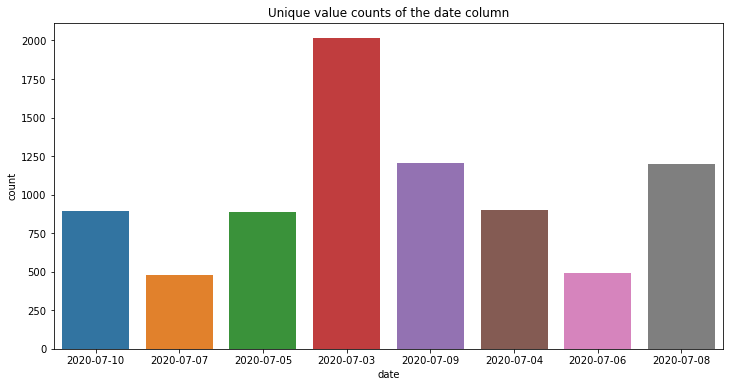

In [76]:
plot(df,'date','Unique value counts of the date column')

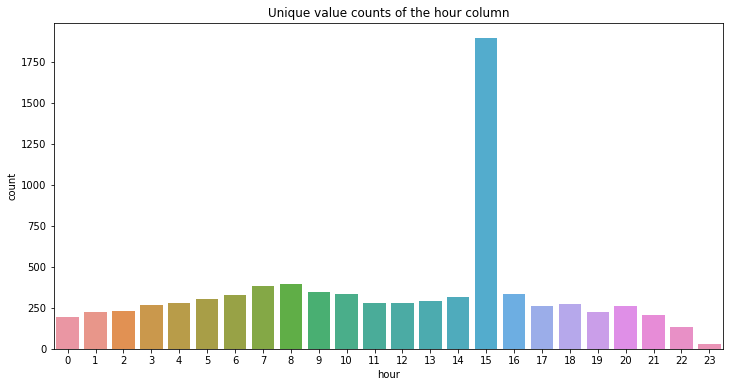

In [77]:
plot(df,'hour','Unique value counts of the hour column')

# Hour 15 was the most busiest as the visitors traffic was very high almost 3 times the average of the rest hours.

In [78]:
df['device_make'].value_counts()

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Samsung SM-A505F          1
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 270, dtype: int64

In [79]:
df['platform_os'].value_counts()


6    7648
5     428
7       1
Name: platform_os, dtype: int64

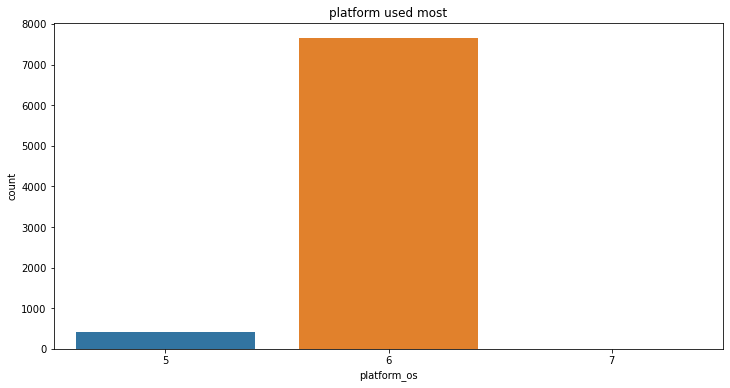

In [96]:
plot(df,'platform_os','platform used most')

In [81]:
df['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

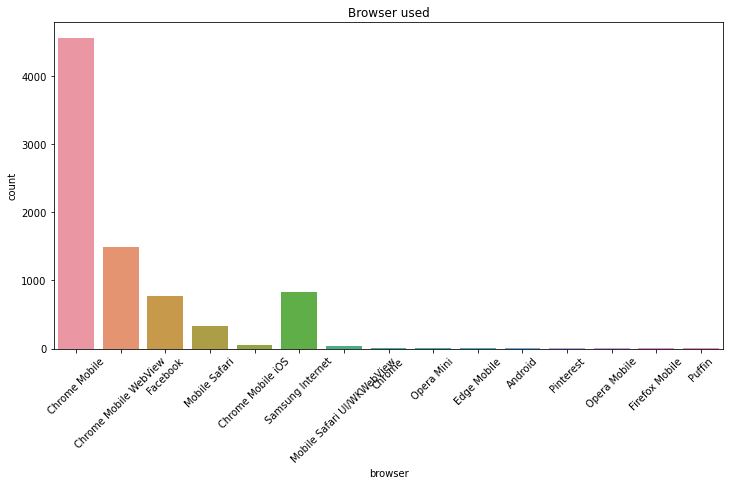

In [83]:
plot(df,"browser",'Browser used',45)


# Chrome is the most used browser

In [84]:
df['no'].value_counts()

0    7406
1     671
Name: no, dtype: int64

In [85]:
df['day'].value_counts()

Friday       2908
Thursday     1208
Wednesday    1198
Saturday      903
Sunday        890
Monday        490
Tuesday       480
Name: day, dtype: int64

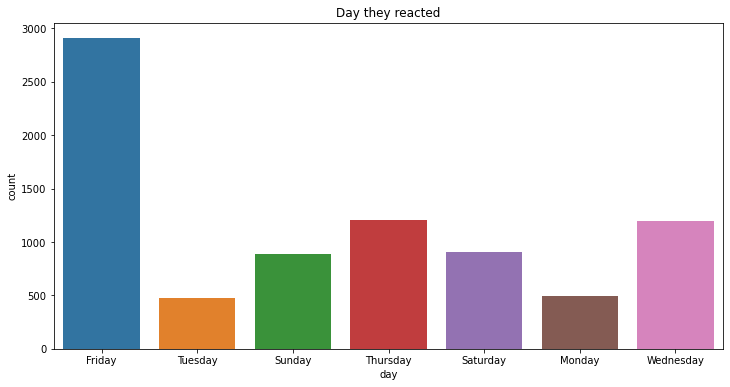

In [86]:
plot(df,'day','D')

# Bivariate Analysis


In [90]:
def bi_plot(df:pd.DataFrame, x_col:str, y_col:str, title:str, rotation=0):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=x_col , hue = y_col)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.show()
    

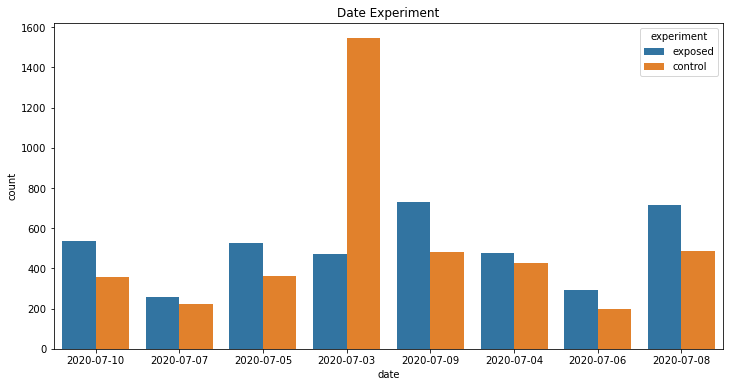

In [91]:
bi_plot(df,'date','experiment','Date Experiment')

experiment  yes  no
control     0    0     3485
exposed     0    0     3349
                 1      349
control     0    1      322
exposed     1    0      308
control     1    0      264
dtype: int64


<AxesSubplot:xlabel='experiment,yes,no'>

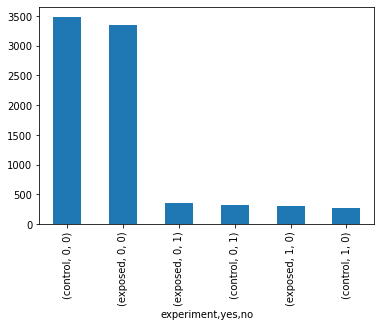

In [5]:
print(df.groupby("experiment")[["yes", "no"]].value_counts().nlargest(10))
df.groupby("experiment")[["yes", "no"]].value_counts().nlargest(10).plot(kind="bar")


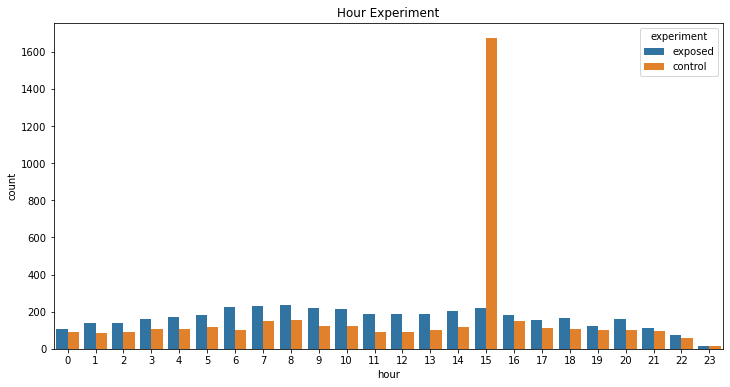

In [92]:
bi_plot(df,'hour','experiment','Hour Experiment')

In [7]:
df[(df.yes == 0) & (df.no == 0)].groupby("hour")[["yes", "no"]].value_counts().nlargest(
    3
)


hour  yes  no
15    0    0     1614
8     0    0      327
7     0    0      322
dtype: int64

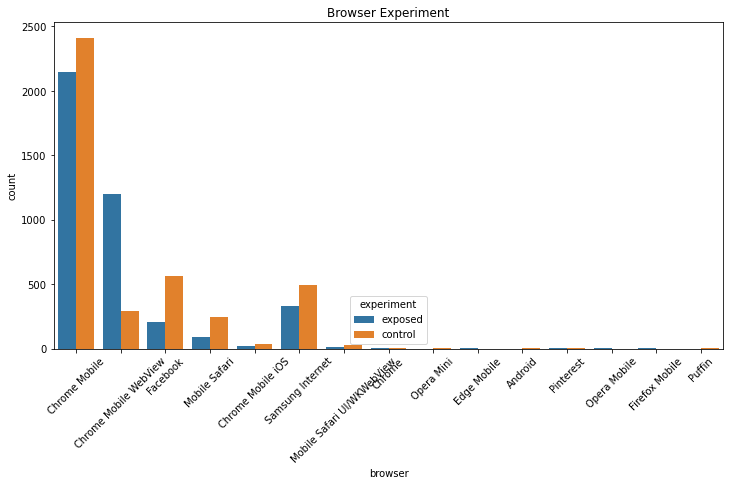

In [93]:
bi_plot(df,'browser','experiment','Browser Experiment',rotation=45)

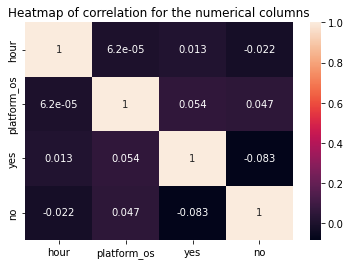

In [94]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of correlation for the numerical columns')
plt.show()

In [3]:
df2 = df.copy(deep=True)
df2 = df2[df2['yes'] == 1].append(df2[df2['no'] == 1])
df2.head(5)

C:\Users\hp\AppData\Local\Temp\ipykernel_16144\3482064264.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2[df2['yes'] == 1].append(df2[df2['no'] == 1])


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [6]:
df2.sample(10)


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
7465,ec4c1cde-1e93-4b47-b5ea-9f31b8cc5295,control,2020-07-04,11,iPhone,5,Chrome Mobile iOS,1,0
1133,2533fe35-e355-4590-a21a-5c1152a92870,control,2020-07-04,3,Samsung SM-J530F,6,Samsung Internet,1,0
6203,c50ab58c-e978-4cd5-8692-639bbd8521ea,control,2020-07-03,15,iPhone,5,Mobile Safari,0,1
2789,59cc2ee4-e210-4b96-8e82-99d0a6cdbe9b,exposed,2020-07-05,13,Generic Smartphone,6,Chrome Mobile,1,0
1637,3622c4eb-44f2-44fa-b6ea-cb169960b823,exposed,2020-07-08,15,Generic Smartphone,6,Chrome Mobile,1,0
258,07a2012e-c818-4bbc-a0ac-dce37efb1067,exposed,2020-07-05,6,Samsung SM-G960F,6,Facebook,0,1
6419,cba5d5f9-1b58-47c9-a9a1-bd0b7ddc2107,control,2020-07-10,1,POT-LX1,6,Facebook,1,0
6049,c03a506f-92e4-41e1-8859-841d21f18349,exposed,2020-07-04,6,Samsung SM-G965F,6,Chrome Mobile WebView,1,0
3712,77a94c11-1b26-45aa-80b6-9947d4c6db20,control,2020-07-03,15,Samsung SM-G930F,6,Samsung Internet,0,1
3487,7098a7db-b899-411d-98b0-ba1dcec9e8d3,control,2020-07-04,21,Generic Smartphone,6,Chrome Mobile,1,0


In [7]:
clean_yes = df2[df2["yes"] == 1].drop(["yes", "no"], axis=1)
clean_yes["user_response"] = 1
clean_no = df2[df2["no"] == 1].drop(["yes", "no"], axis=1)
clean_no["user_response"] = 0
responsee = clean_yes.append(clean_no).reset_index(drop=True)
responsee.sample(10)


C:\Users\hp\AppData\Local\Temp\ipykernel_16144\2780283376.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  responsee = clean_yes.append(clean_no).reset_index(drop=True)


,auction_id,experiment,date,hour,device_make,platform_os,browser,user_response
330,a10f359f-02a7-46eb-857b-bd81f9887a77,exposed,2020-07-04,11,Generic Smartphone,6,Chrome Mobile,1
11,0587d2d4-d47a-4872-ace2-a460eea468f3,exposed,2020-07-09,1,Generic Smartphone,6,Chrome Mobile,1
632,18c91749-afe9-4495-a39b-642f26481b1e,exposed,2020-07-10,5,Moto $2,6,Chrome Mobile WebView,0
854,6efe4e0c-bfc8-4056-9789-9d74d7eda6ca,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
443,cb900a89-a572-43e0-a342-2555ea0a58af,exposed,2020-07-07,9,Generic Smartphone,6,Chrome Mobile WebView,1
681,2fd3a02a-0d0d-46b3-8c1e-141ce9bc4c59,control,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0
322,9d958055-c1bf-44bb-ab31-f787ca9e116c,exposed,2020-07-08,20,Generic Smartphone,6,Chrome Mobile,1
260,80fc937f-f009-4d1a-ae68-4615b9e7f927,control,2020-07-08,17,Generic Smartphone,6,Chrome Mobile,1
1047,b4c6c6fd-43fc-4e13-a9a0-707095578e2a,control,2020-07-07,14,Generic Smartphone,6,Chrome Mobile,0
733,45e947eb-4da1-4233-9d59-312fa218bd50,exposed,2020-07-08,20,Samsung SM-J510FN,6,Samsung Internet,0


In [8]:
responsee.to_csv('../data/cleaned_data.csv', index=False)